<a href="https://colab.research.google.com/github/Jason-Str/Final-Project/blob/main/Toxicity%20Classifier%20Model%20on%20Youtube%20Communities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Toxicity Classifier



### General Information
Model Used:

https://huggingface.co/s-nlp/roberta_toxicity_classifier

Toxicity Classification Model:

This model is trained for toxicity classification task. The dataset used for training is the merge of the English parts of the three datasets by Jigsaw (Jigsaw 2018, Jigsaw 2019, Jigsaw 2020), containing around 2 million examples. We split it into two parts and fine-tune a RoBERTa model (RoBERTa: A Robustly Optimized BERT Pretraining Approach) on it. The classifiers perform closely on the test set of the first Jigsaw competition, reaching the AUC-ROC of 0.98 and F1-score of 0.76.



### Credits

In [ ]:
@inproceedings{logacheva-etal-2022-paradetox,
    title = "{P}ara{D}etox: Detoxification with Parallel Data",
    author = "Logacheva, Varvara  and
      Dementieva, Daryna  and
      Ustyantsev, Sergey  and
      Moskovskiy, Daniil  and
      Dale, David  and
      Krotova, Irina  and
      Semenov, Nikita  and
      Panchenko, Alexander",
    booktitle = "Proceedings of the 60th Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers)",
    month = may,
    year = "2022",
    address = "Dublin, Ireland",
    publisher = "Association for Computational Linguistics",
    url = "https://aclanthology.org/2022.acl-long.469",
    pages = "6804--6818",
    abstract = "We present a novel pipeline for the collection of parallel data for the detoxification task. We collect non-toxic paraphrases for over 10,000 English toxic sentences. We also show that this pipeline can be used to distill a large existing corpus of paraphrases to get toxic-neutral sentence pairs. We release two parallel corpora which can be used for the training of detoxification models. To the best of our knowledge, these are the first parallel datasets for this task.We describe our pipeline in detail to make it fast to set up for a new language or domain, thus contributing to faster and easier development of new parallel resources.We train several detoxification models on the collected data and compare them with several baselines and state-of-the-art unsupervised approaches. We conduct both automatic and manual evaluations. All models trained on parallel data outperform the state-of-the-art unsupervised models by a large margin. This suggests that our novel datasets can boost the performance of detoxification systems.",
}

### Import Model

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

tokenizer = RobertaTokenizer.from_pretrained('s-nlp/roberta_toxicity_classifier')
model = RobertaForSequenceClassification.from_pretrained('s-nlp/roberta_toxicity_classifier')

batch = tokenizer.encode("You are amazing!", return_tensors="pt")

output = model(batch)
# idx 0 for neutral, idx 1 for toxic

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import torch.nn.functional as F

#Creating classify_toxicity
def classify_toxicity(text):
  inputs = tokenizer(text, return_tensors="pt")
  outputs = model(**inputs)
  logits = outputs.logits
  probabilities = F.softmax(logits, dim=1)
  toxicity_score = probabilities[0][1].item()
  predicted_class = torch.argmax(logits, dim=1).item()

#To determine Neutral or Toxic classification
  if predicted_class == 0:
    result = "Neutral"
  else:
    result = "Toxic"

  return result, toxicity_score

# Example usage
text = ["shut up"]
result, score = classify_toxicity(text)
print(f"Text: '{text}' is classified as: {result} with a toxicity score of {score:.4f}")

Text: '['shut up']' is classified as: Toxic with a toxicity score of 0.9973


##Dataset General Information
*   The model and datasets will be used to analyze the impact of toxic comments on online communities, in this context, the communities will be the Youtubers' communities.
*   The 1st Dataset will contain comments to give an understanding of what the code will do and how it will help with evaluating the data. The others will not contain them as they will just be repeating the same codes.
*   The model being used will evaluate toxicity from 0 being neutral and 1 being toxic which will mean that the results cannot determine the type of toxicity.




## Dataset 1 (Atrioc)

In [ ]:
#Using Professor's Youtube API Comments collection code
from googleapiclient.discovery import build

# Your YouTube API key
API_KEY = ''  # Replace with your actual API key

# YouTube API service name and version
YOUTUBE_API_SERVICE_NAME = 'youtube'
YOUTUBE_API_VERSION = 'v3'

def get_video_comments(video_id, max_results=200):
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=API_KEY)

    comments = []
    nextPageToken = None

    while len(comments) < max_results:  # Stop when we have enough comments
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            textFormat='plainText',  # Get comments as plain text
            maxResults=min(100, max_results - len(comments)),  # Get up to 100 at a time or remaining
            pageToken=nextPageToken,
        )
        response = request.execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)

        nextPageToken = response.get('nextPageToken')  # Get next page token

        if not nextPageToken:  # Stop if there are no more pages
            break

    return comments

# Example usage
video_id = 'yOWjxbaPzdA'  # Replace with the actual video ID
comments = get_video_comments(video_id, max_results=100)

# Print the first 100 comments
for comment in comments:
    print(comment)

Trump won 🥇
you should watch fox next time. they get their tallies in faster, i dont know why or how but they do. it was over before 3 am on fox
The only thing LESS interesting than this video, was your 'hosting' of it.
It’s not that I believe everything he says, it’s just that I know what Biden and Kamala have done for the past 4 years and I’m hopeful that what trump says about the border and economy are true. And there is more positive for him than her by a lot. If there was a better Democratic candidate then there would be a good chance I would have voted blue.
ny & calif is how democrats want the U.S. to be, and thats not good at all.
Love the music. Best video game OST of all time
Certain groups of people who are leaving the country should leave and Make America Great Again
You don't  know Trump well sorry for your ignorance!
I'm a Trump voter and i'm glad that he won, but I still enjoyed your stream dude!
I love these salt mines 😂😂
Bro was laughing about the people trump shouted 

Youtube API

The API is used to get 100 comments from videos. The comments will then be processed into the model to evaluate the toxicity.

Dataset 1

https://www.youtube.com/watch?v=yOWjxbaPzdA

This Youtube video is uploaded by a Youtuber named Atrioc that showed his reaction throughout the election day. Atrioc is a Business and Gaming Youtuber that has publicly shown his interest in Kamala Harris winning but has mentioned that he thinks Donald Trump will win.

In [ ]:
!pip install emoji
import pandas as pd
import emoji #turning emojis into text
from IPython.display import display
#The comments include emojis which the model cannot evaluate. Turning emojis into text to help.

atriocdata = []
for comment in comments:
    translated_comment = emoji.demojize(comment)

    result, score = classify_toxicity(comment)

    atriocdata.append({
        'Comment': translated_comment,
        'Label': result,
        'Score': score
    })
#Creating the data from evaluating the likelihood of toxicity of the comments

dfatrioc = pd.DataFrame(atriocdata)
display(dfatrioc)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 11.1 MB/s eta 0:00:00


,Comment,Label,Score
0,Trump won :1st_place_medal:,Neutral,0.000055
1,you should watch fox next time. they get their...,Neutral,0.000089
2,The only thing LESS interesting than this vide...,Neutral,0.000220
3,"It’s not that I believe everything he says, it...",Neutral,0.000033
4,ny & calif is how democrats want the U.S. to b...,Neutral,0.000082
...,...,...,...
95,I think she’s relieved she didn’t win… she got...,Neutral,0.042029
96,I wouldn’t mock GOD little boy,Neutral,0.004054
97,What a jerk! Why am I watching this Democrat,Toxic,0.999219
98,5:13\nAmazing jump cuts at 5:21…….\n“.. this t...,Neutral,0.000042


### Dataset Evaluation

In [ ]:
dfatrioc = pd.DataFrame(atriocdata)
print(dfatrioc.sort_values(by=['Score'], ascending=False))
#Evaluating Min and Max Scores from this Dataset

                                              Comment    Label     Score
16                                  This guys a idiot    Toxic  0.999586
97       What a jerk! Why am I watching this Democrat    Toxic  0.999219
37                                     FDR sucked ass    Toxic  0.998851
65  Isn't this the dude who masturbated? Hes a fas...    Toxic  0.998788
86                Damn the dickriding of FDR is crazy    Toxic  0.996557
..                                                ...      ...       ...
43  You do recall that Trump kept all of his promi...  Neutral  0.000035
67  I’ll be honest this is probably the first pers...  Neutral  0.000034
30  Just odd so many people didnt vote in 2024 tha...  Neutral  0.000034
3   It’s not that I believe everything he says, it...  Neutral  0.000033
56  1st year of the next presidency ( whichever pr...  Neutral  0.000032

[100 rows x 3 columns]


In [ ]:
toxic_comments = dfatrioc[dfatrioc['Label'] == 'Toxic']

print("Toxic Comments:", len(dfatrioc[dfatrioc['Label'] == 'Toxic']))
for comment in toxic_comments['Comment']:
    print(comment)
#Printing all Toxic comments to see the target of the toxicity

Toxic Comments: 14
You don't  know Trump well sorry for your ignorance!
This guys a idiot
Hey SpeedyTrey in chat. Thank you for being so tolerable, as you all claim to be, and saying I’m a “freak” for being a gay republican. Saying “gay republicans are freaks” is actually the most freakish shit I’ve heard today lol 
God forbid I think for myself! If only I just voted to spend more money on immigration, irreversibly damaging children’s bodies before they can make decisions about it themselves when their brains are fully developed, and letting people that are ACTUALLY homophobic POUR into the country that, again, we spend money on. Oh jeez, I really missed out! 
I should’ve just let the media convince me Trump is a racist, xenophobic, Islamophobic, Hitlerian, facist, homophobic, transphobic, blah blah blah blah blah. Give me a break. 
I’m a damn American. Being gay doesn’t make up my entire existence. Also, when you really wanna break it down, it’s quite literally in our best interest to

# Dataset 2 (Hasanabi)

In [ ]:
from googleapiclient.discovery import build

# Your YouTube API key
API_KEY = ''  # Replace with your actual API key

# YouTube API service name and version
YOUTUBE_API_SERVICE_NAME = 'youtube'
YOUTUBE_API_VERSION = 'v3'

def get_video_comments(video_id, max_results=200):
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=API_KEY)

    comments = []
    nextPageToken = None

    while len(comments) < max_results:  # Stop when we have enough comments
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            textFormat='plainText',  # Get comments as plain text
            maxResults=min(100, max_results - len(comments)),  # Get up to 100 at a time or remaining
            pageToken=nextPageToken,
        )
        response = request.execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)

        nextPageToken = response.get('nextPageToken')  # Get next page token

        if not nextPageToken:  # Stop if there are no more pages
            break

    return comments

# Example usage
video_id = 'MI8-uu_1AHw'  # Replace with the actual video ID
comments = get_video_comments(video_id, max_results=100)

# Print the first 100 comments
for comment in comments:
    print(comment)

Boy u was wrong as f
☹️
Hahahahah what an idiot! 🤣
My friend sent me this video so that I could better understand her thoughts of the election. Now it is up to her to absorb the undeniable truth that you were wrong about everything.
Major L son
Hasan was wrong just like everyone else who’s hatred for Republicans blinded them to the crying struggles of the middle working class.
Coming here from the video with Quenlin Blackwell, but this is one of the hottest men I've ever seen in my life. OMG...like I've discovered a whole new type of man😍
Hasan knows he is white right? Like legally he is white. According to medical colleges he is white. According to the government he is white?
watching this with hindsight knowing how wrong and stupid you are hits soooo good
Permissible bigotry is really important to understand. When you use dogwhistles and more vague phrases, you not only avoid scaring away suburban whites, but you can also still win over some folks in the groups being insulted.

A goo

Dataset 2

https://www.youtube.com/watch?v=MI8-uu_1AHw

This Youtube Video was uploaded by a Youtuber named Hasanabi on his reaction during election day. Hasanabi is a Youtuber that showed interest in Kamila Harris winning and believes that Kamala Harris will win on election day.

In [ ]:
hasandata = []
for comment in comments:
    translated_comment = emoji.demojize(comment)

    result, score = classify_toxicity(comment)

    hasandata.append({
        'Comment': translated_comment,
        'Label': result,
        'Score': score
    })

dfhasan = pd.DataFrame(hasandata)
display(dfhasan)

,Comment,Label,Score
0,Boy u was wrong as f,Neutral,0.001302
1,:frowning_face:,Neutral,0.000040
2,Hahahahah what an idiot! :rolling_on_the_floor...,Toxic,0.999597
3,My friend sent me this video so that I could b...,Neutral,0.000033
4,Major L son,Neutral,0.000052
...,...,...,...
95,Vote third party…nice now we got this guy…trum...,Toxic,0.980308
96,Hasan was wrong last time too lmao,Neutral,0.000060
97,This did not age well:grinning_face_with_sweat:,Neutral,0.000052
98,LASANABI,Neutral,0.000066


### Dataset Evaluation

In [ ]:
dfhasan = pd.DataFrame(hasandata)
print(dfhasan.sort_values(by=['Score'], ascending=False))

                                              Comment    Label     Score
2   Hahahahah what an idiot! :rolling_on_the_floor...    Toxic  0.999597
58                                        haha stupid    Toxic  0.999453
85  What an idiot. \n\nCan’t wait to see him blame...    Toxic  0.999383
8   watching this with hindsight knowing how wrong...    Toxic  0.999270
82                          Hassan is a liberal loser    Toxic  0.999180
..                                                ...      ...       ...
70  The polls, the real ones always indicated a Tr...  Neutral  0.000036
23  Wasn’t Harris’ campaign heavily funded by Bide...  Neutral  0.000035
43                   Time to see the cope, can't wait  Neutral  0.000034
3   My friend sent me this video so that I could b...  Neutral  0.000033
72  "Does that strike you as a guy that didn't exp...  Neutral  0.000033

[100 rows x 3 columns]


In [ ]:
toxic_comments2 = dfhasan[dfhasan['Label'] == 'Toxic']

print("Toxic Comments:", len(dfhasan[dfhasan['Label'] == 'Toxic']))
for comment in toxic_comments2['Comment']:
    print(comment)

Toxic Comments: 21
Hahahahah what an idiot! :rolling_on_the_floor_laughing:
watching this with hindsight knowing how wrong and stupid you are hits soooo good
Libtards think she ran a good campaign because Megan the Stallion came to shake her butt on stage and J-Lo was close to tears. lol. Love it.
Wait a sec.. women can cheat, get the kids, the cars, the house, the dog, can use child support money for themselves, and endless alimony and want the ability to kill the fetus at will.. and women still blame men for not siding with them.. to protect "their rights". Wow dass crazy
Ultimately, looking back, it was ridiculous of us to expect people who once voted for Trump and/or were barely willing to vote for Biden to turn around and vote for a BLACK WOMAN :woman_facepalming_light_skin_tone:
Poor guy doesn’t realize he’s basically helpful opposition. The ignorant confidence that the left wallows in turns more people to the right than anything.
Bernie do us all a favor and STFU and go away. We

#Dataset 3 (Kylie Jenner)

In [ ]:
# https://www.youtube.com/watch?v=sAQxc2W6ifY

from googleapiclient.discovery import build

# Your YouTube API key
API_KEY = ''  # Replace with your actual API key

# YouTube API service name and version
YOUTUBE_API_SERVICE_NAME = 'youtube'
YOUTUBE_API_VERSION = 'v3'

def get_video_comments(video_id, max_results=200):
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=API_KEY)

    comments = []
    seen_comments = set()
    nextPageToken = None

    while len(comments) < max_results:  # Stop when we have enough comments
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            textFormat='plainText',  # Get comments as plain text
            maxResults=min(100, max_results - len(comments)),  # Get up to 100 at a time or remaining
            pageToken=nextPageToken,
        )
        response = request.execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']

            if comment not in seen_comments:  # Check if comment is a duplicate
                comments.append(comment)
                seen_comments.add(comment)  # Add comment to seen_comments set

        nextPageToken = response.get('nextPageToken')  # Get next page token

        if not nextPageToken:  # Stop if there are no more pages
            break

    return comments
#Attempt to decrease duplicates of comments

# Example usage
video_id = 'sAQxc2W6ifY'  # Replace with the actual video ID
comments = get_video_comments(video_id, max_results=100)

# Print the first 100 comments
for comment in comments:
    print(comment)

❤ super 🤗
Waht a poor shit human khloe kardashian I just wanna see you underground your time is coming soon khloe God is going to show how to play with his blessing money or children or family or how to play with your body God is watching and you saw that khloe... You always normally search for a dirty person why now you are looking for a good person wahts happen... Khloe do you think a man like me his dream is to stay beside you never... I have understood waht really love is I understood everything better now Am more richer now in my soul and spirit and body but my pocket is empty you stole it all khloe but it doesn't matter God has a new plan for me darling
God Damm your children khloe kardashian god Damm the children of your sisters God Damm your face khloe shit God Damm your children khloe kardashian god Damm your life God Damm your face God Damm your money God Damm your work khloe kardashian god Damm your workers God Damm your children khloe kardashian
Just to show how Am thankful

Dataset 3

https://www.youtube.com/watch?v=sAQxc2W6ifY

This Youtube Video is Kylie Jenner's last video before she stopped uploading on Youtube. The video is a Behind The Scenes video that does not align with any political views and can be considered a neutral video. A neutral video, in my definition, would be a video that does not incite any hate or push any agenda but rather just a video that wants the attention of youtube viewers.

In [ ]:
kyliedata = []
for comment in comments:
    translated_comment = emoji.demojize(comment)

    result, score = classify_toxicity(comment)

    kyliedata.append({
        'Comment': translated_comment,
        'Label': result,
        'Score': score
    })

dfkylie = pd.DataFrame(kyliedata)
display(dfkylie)

,Comment,Label,Score
0,:red_heart: super :smiling_face_with_open_hands:,Neutral,0.000047
1,Waht a poor shit human khloe kardashian I just...,Toxic,0.990472
2,God Damm your children khloe kardashian god Da...,Toxic,0.998369
3,Just to show how Am thankful khloe God Damm yo...,Toxic,0.997165
4,God Damm your children khloe kardashian god Da...,Toxic,0.783711
...,...,...,...
95,It's enough idiot to talk to idiots like you guys,Toxic,0.999638
96,Khloe you are embracing me to say my opinion I...,Toxic,0.989043
97,Have you ever seen a dog doesn't like his self...,Toxic,0.991235
98,Disgusting khloe go and run after someone who ...,Toxic,0.999287


### Dataset Evaluation

In [ ]:
dfkylie = pd.DataFrame(kyliedata)
print(dfkylie.sort_values(by=['Score'], ascending=False))

                                              Comment    Label     Score
95  It's enough idiot to talk to idiots like you guys    Toxic  0.999638
82  Khloe your steps are showing how idiot you are...    Toxic  0.999631
84  The most idiot human khloe kardashian the most...    Toxic  0.999500
63  Khloe shit you are not Tristan his shit :grinn...    Toxic  0.999448
92  Khloe I have never meet a idiot like you you h...    Toxic  0.999443
..                                                ...      ...       ...
50                What are these george people doing/  Neutral  0.000045
36                              Tell the Mr president  Neutral  0.000040
22                                    Soon new video?  Neutral  0.000038
31                                        Do you know  Neutral  0.000038
44   I think the whole family love to hear this words  Neutral  0.000034

[100 rows x 3 columns]


In [ ]:
toxic_comments3 = dfkylie[dfkylie['Label'] == 'Toxic']

print("Toxic Comments:", len(dfkylie[dfkylie['Label'] == 'Toxic']))
for comment in toxic_comments3['Comment']:
    print(comment)

Toxic Comments: 58
Waht a poor shit human khloe kardashian I just wanna see you underground your time is coming soon khloe God is going to show how to play with his blessing money or children or family or how to play with your body God is watching and you saw that khloe... You always normally search for a dirty person why now you are looking for a good person wahts happen... Khloe do you think a man like me his dream is to stay beside you never... I have understood waht really love is I understood everything better now Am more richer now in my soul and spirit and body but my pocket is empty you stole it all khloe but it doesn't matter God has a new plan for me darling
God Damm your children khloe kardashian god Damm the children of your sisters God Damm your face khloe shit God Damm your children khloe kardashian god Damm your life God Damm your face God Damm your money God Damm your work khloe kardashian god Damm your workers God Damm your children khloe kardashian
Just to show how Am

# Dataset 4 (DrDisrespect)

In [ ]:
# https://www.youtube.com/watch?v=sAQxc2W6ifY

from googleapiclient.discovery import build

# Your YouTube API key
API_KEY = ''  # Replace with your actual API key

# YouTube API service name and version
YOUTUBE_API_SERVICE_NAME = 'youtube'
YOUTUBE_API_VERSION = 'v3'

def get_video_comments(video_id, max_results=200):
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=API_KEY)

    comments = []
    seen_comments = set()
    nextPageToken = None

    while len(comments) < max_results:  # Stop when we have enough comments
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            textFormat='plainText',  # Get comments as plain text
            maxResults=min(100, max_results - len(comments)),  # Get up to 100 at a time or remaining
            pageToken=nextPageToken,
        )
        response = request.execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']

            if comment not in seen_comments:  # Check if comment is a duplicate
                comments.append(comment)
                seen_comments.add(comment)  # Add comment to seen_comments set

        nextPageToken = response.get('nextPageToken')  # Get next page token

        if not nextPageToken:  # Stop if there are no more pages
            break

    return comments
#Attempt to decrease duplicates of comments

# Example usage
video_id = 'nApaWeO20VU'  # Replace with the actual video ID
comments = get_video_comments(video_id, max_results=100)
#https://www.youtube.com/watch?v=nApaWeO20VU

# Print the first 100 comments
for comment in comments:
    print(comment)

Moving to Rumble has to be the biggest slap in the face to all the people who became members on your Youtube... Didn't even give the people a heads up.
great now he is streaming on rumble and not youtube anymore....
Doc you ought to double down. Those virgins don’t understand real life struggles. There’s pleeeeeeeenty worse. You only had a slip up. 
STAY STRONG
Why is he not banned
Dr445
DOC GIMMIE THJAT 25K!!!
Opens Video to watch Him Play:❌
Opens Video to read the Comments:✅
Do people forget he raped a minor???
Dr DisRespect. No you can't have my sister but you can have some 🧁🧁🧁🧁🧁🧁 yummy yummy
turned off comments WONT stop us
12:06  bro has lots of practice in creating lullabies for babies
WAKE UP @DrDisRespect we are all ready to see you in a hospital gown with your vest overtop laying in bed playing 😂
Dr Disrespect is too busy talking to 6 year old girls
Hey doc, whens the next video coming out? These ones are getting pretty old and its not like you to wait for things to get old...

Dataset 4

https://www.youtube.com/watch?v=nApaWeO20VU


This dataset used comments from Dr Disrespect's latest youtube video with comments enabled. He is known as a problem Youtuber as he was caught cheating on his wife in the past along with several allegations of grooming. These events lead to multiple breaks from streaming and recently attempted to return to streaming and uploading. The data has comments that require context to understand that they are toxic.

In [ ]:
drdata = []
for comment in comments:
    translated_comment = emoji.demojize(comment)

    result, score = classify_toxicity(comment)

    drdata.append({
        'Comment': translated_comment,
        'Label': result,
        'Score': score
    })

dfdr = pd.DataFrame(drdata)
display(dfdr)

,Comment,Label,Score
0,Moving to Rumble has to be the biggest slap in...,Neutral,0.017655
1,great now he is streaming on rumble and not yo...,Neutral,0.000056
2,Doc you ought to double down. Those virgins do...,Neutral,0.114187
3,Why is he not banned,Neutral,0.000138
4,Dr445,Neutral,0.000058
...,...,...,...
95,all the interactions w/ his content is putting...,Neutral,0.000036
96,all you would have to do is post the convo to ...,Neutral,0.000307
97,You like them young,Neutral,0.000069
98,6:44 :face_with_tears_of_joy::face_with_tears_...,Neutral,0.000041


### Dataset Evaluation

In [ ]:
dfdr = pd.DataFrame(drdata)
print(dfdr.sort_values(by=['Score'], ascending=False))

                                              Comment    Label     Score
38  why people still donate big money for give it ...    Toxic  0.998969
7                Do people forget he raped a minor???    Toxic  0.995454
37  Y’all r a bunch of losers lol. I bet u think i...    Toxic  0.994704
20                                         DR RAPEIST    Toxic  0.992055
35  I always knew there was something off about th...    Toxic  0.987014
..                                                ...      ...       ...
95  all the interactions w/ his content is putting...  Neutral  0.000036
79                            We still haven’t forgot  Neutral  0.000036
81  He's deleting comments on the live stream vide...  Neutral  0.000036
6   Opens Video to watch Him Play::cross_mark:\nOp...  Neutral  0.000036
57                   Read my donation how you read cp  Neutral  0.000035

[100 rows x 3 columns]


In [ ]:
toxic_comments4 = dfdr[dfdr['Label'] == 'Toxic']

print("Toxic Comments:", len(dfdr[dfdr['Label'] == 'Toxic']))
for comment in toxic_comments4['Comment']:
    print(comment)

Toxic Comments: 11
Do people forget he raped a minor???
DR RAPEIST
BAHAHAHAHAHA. LOST YOUR APPEAL DAWG :face_with_tears_of_joy: Get a real 9 to 5 job buddy :face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy:
Bro is such a creep
I always knew there was something off about this clown yet everyone praised him
Y’all r a bunch of losers lol. I bet u think it’s okay to change a child’s gender but doc can’t respond on messenger to a fan. Bunch of little  boys dressed as girls
why people still donate big money for give it to charity idiots
Dammmmmmm even kick don't want you:rolling_on_the_floor_laughing::rolling_on_the_floor_laughing::rolling_on_the_floor_laughing:
Bro left the comments open :skull: you belong in jail
Someone tried to destroy Doc’s reputation and it attracted all the actual creepers to comment. Almost not a single sane person out here with the sick comments.
So we are just gonna forget that he is a paedo??


In [ ]:
#To display that there are toxic comments that can objectively be considered toxic with context

neutral_comments = dfdr[dfdr['Label'] == 'Neutral']

print("Neutral_comments", len(dfdr[dfdr['Label'] == 'Neutral']))
for comment in neutral_comments['Comment']:
    print(comment)

Neutral_comments 89
Moving to Rumble has to be the biggest slap in the face to all the people who became members on your Youtube... Didn't even give the people a heads up.
great now he is streaming on rumble and not youtube anymore....
Doc you ought to double down. Those virgins don’t understand real life struggles. There’s pleeeeeeeenty worse. You only had a slip up. 
STAY STRONG
Why is he not banned
Dr445
DOC GIMMIE THJAT 25K!!!
Opens Video to watch Him Play::cross_mark:
Opens Video to read the Comments::check_mark_button:
Dr DisRespect. No you can't have my sister but you can have some :cupcake::cupcake::cupcake::cupcake::cupcake::cupcake: yummy yummy
turned off comments WONT stop us
12:06  bro has lots of practice in creating lullabies for babies
WAKE UP @DrDisRespect we are all ready to see you in a hospital gown with your vest overtop laying in bed playing :face_with_tears_of_joy:
Dr Disrespect is too busy talking to 6 year old girls
Hey doc, whens the next video coming out? Thes

# Overall Dataset Evaluation

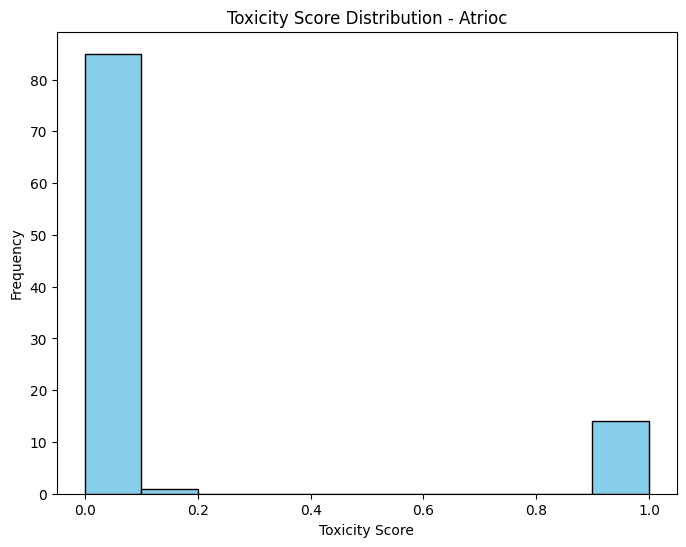

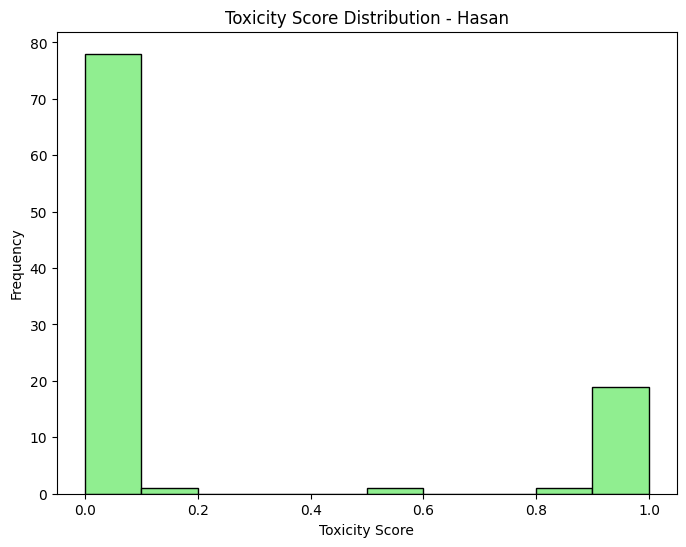

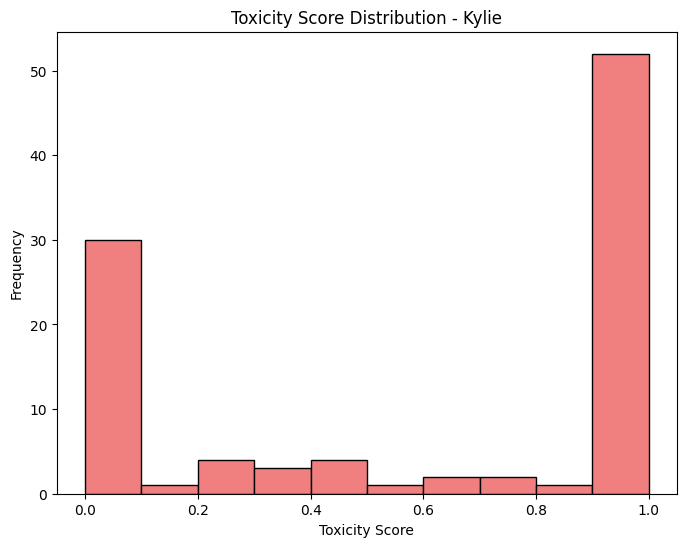

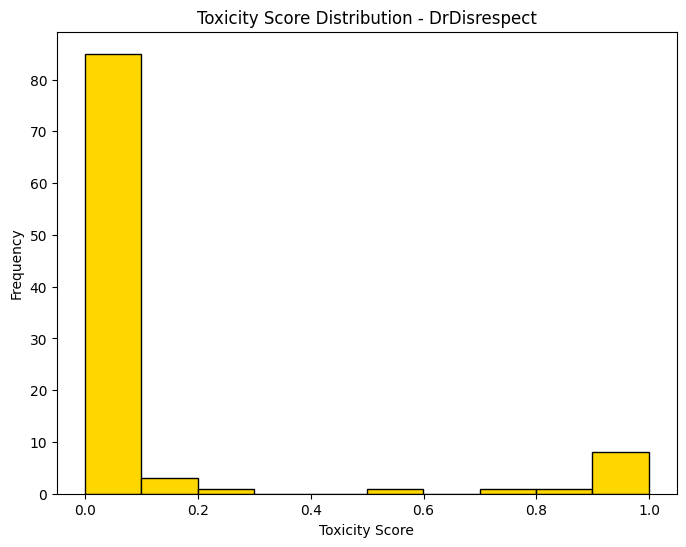

In [ ]:
import matplotlib.pyplot as plt
#Showing how spread apart the toxicity scores of each Youtuber was

# Atrioc
plt.figure(figsize=(8, 6))
plt.hist(dfatrioc['Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Toxicity Score Distribution - Atrioc')
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')
plt.show()

# Hasan
plt.figure(figsize=(8, 6))
plt.hist(dfhasan['Score'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Toxicity Score Distribution - Hasan')
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')
plt.show()

# Kylie
plt.figure(figsize=(8, 6))
plt.hist(dfkylie['Score'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Toxicity Score Distribution - Kylie')
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')
plt.show()

# DrDisrespect
plt.figure(figsize=(8, 6))
plt.hist(dfdr['Score'], bins=10, color='gold', edgecolor='black')
plt.title('Toxicity Score Distribution - DrDisrespect')
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')
plt.show()

Histogram will allow us to see the frequency of the varying toxicity scores between streamers.

Keeping

In [ ]:
def summarize_toxicity(df, youtubername):
    """Calculates toxicity metrics for a given youtuber's DataFrame."""
    num_comments = len(df)
    max_score = df['Score'].max() if not df.empty else 0
    avg_score = df['Score'].mean() if not df.empty else 0
    num_toxic = len(df[df['Label'] == 'Toxic'])
    return {'Youtuber': youtubername, 'Number of Toxic Comments': num_toxic, 'Max Toxicity Score': max_score, 'Average Toxicity Score': avg_score}
#We did not reduce the number of decimals as the Max Toxicity scores were 4 decimal place digits away from 1.0
#The Average Toxicity Scores are also left to 6 decimal places but will be rounded up in the observations later

summary_data = []

summary_data.append(summarize_toxicity(dfatrioc, 'Atrioc'))
summary_data.append(summarize_toxicity(dfhasan, 'Hasan'))
summary_data.append(summarize_toxicity(dfkylie, 'Kylie'))
summary_data.append(summarize_toxicity(dfdr, 'DrDisrespect'))

summary_table = pd.DataFrame(summary_data)
summary_table.set_index('Youtuber', inplace=True)

summary_table

,Number of Toxic Comments,Max Toxicity Score,Average Toxicity Score
Youtuber,,,
Atrioc,14,0.999586,0.142900
Hasan,21,0.999597,0.206288
Kylie,58,0.999638,0.600190
DrDisrespect,11,0.998969,0.108526


## Observations of the Data

### Atrioc
The video is about a Business Youtuber, who is pro-Kamala but believes Trump will win, reacting to the US Election results. In the first 100 comments, it is shown that **14 of them were likely to be toxic** with a **Max toxicity of 0.999586**. **The average toxicity of all the comments was 0.143** which was the second lowest in the dataset.

### Hasan
The video used is about a political Youtuber, who is also pro-Kamala and believes Kamala will win, reacting to the US Election results. In the first 100 comments, it is shown that **21 were likely to be toxic** with a **Max toxicity of 0.999597**. **The average toxicity of all the comments was 0.206**

### Kylie
This video was the last video uploaded by Kylie Jenner, a celebrity, which was a behind the scenes video of an event she was in. In the first 100 comments, it is shown that **58 of them were likely to be toxic** with a **Max toxicity of 0.999597**. **The average toxicity score of the comments was 0.60**, being the highest.

### Dr Disrespect
This video was chosen as a data that required context to understand the toxicity in the comments. Dr Disrespect is a Youtuber that has taken a break from video creation multiple times as multiple allegations have been reported of him. The video comments would be difficult to detect toxicity as, once again, requires context to understand. With **11 of the comments likely to be toxic**, with a **Max of 0.998969** and an **Average of 0.108** it has the lowest values of all features.

Notes: Dr Disrespect's video is used in this dataset to show the restrictions of this model and the data when purely using youtube comments.

## Analysis
The data shows that toxicity is present in all types of Youtuber communities and videos. The minimum being 11 toxic comments out of 100 comments used shows that at least 10% of comments in videos are likely to be toxic. The target of the toxicity can change the effect of the toxicity towards the Youtuber's communities.

The videos used to represent Hasan and Atrioc were both videos of the election but the difference were what type of communities they had. Hasan is a political Youtuber with a community that has the same opinion as him and Atrioc is a business Youtuber who does not push for any political agenda. When Donald Trump won, it can be seen that Hasan's video had more toxic comments as well as a higher maximum toxicity score. This is likely because most of his fans were of the same belief that Kamala would have won over Donald Trump. Atrioc's fans are fans of his business and gaming content which makes it likely that the toxicity is happening from fighting between fans of different political opinions. These show toxicity of different targets. One is toxicity towards another community, while the other is toxicity within the community.

Kylie Jenner and Dr Disrespect are both target of toxicity from individuals of different groups towards Youtubers. Kylie Jenner's video was a behind the scenes video during an event she was present. The video was not meant to incite or push for any agenda but rather just a video to pull views. The video received 58 toxic comments with an overall average of 0.61 toxicity score from all the 100 comments, having the highest average toxicity score from the 4 datasets. These are likely not from her community but individuals commenting on her video. The effect of the toxicity from this video caused her to stop uploading Youtube videos which makes this video her last upload.

Dr Disrespect is a Youtuber that has been receiving hate after multiple allegations surfaced and after he announced that he cheated on his wife. He attempts to return after every incident and receives many hate comments. Since the model cannot receive the context of the comments, it can only detect the comments that are directly insulting him with no mention of past events or allegations. This dataset was picked to show the restrictions of the model when evaluating comments that require context to understand the toxicity. Because of this, the model could only accept 11 comments as toxic with an average of 0.108.

## Conclusion

There are varying effects of toxicity towards communities, in this context they can either be positive or negative. The toxicity classifier can be used to detect toxicity and if connected to the correct program, would be able to automatically delete toxic comments before it reaches the Youtuber. In the case of Kylie Jenner, she likely would have continued posting videos.

## Future Considerations
Improving the toxicity classification program's accuracy, inclusivity, and adaptability should be the main goals of future research. To lessen bias and guarantee that the classifier works well across many languages, cultural contexts, and marginalized groups, increasing the diversity and representativeness of the training dataset is a crucial area for improvement. The accuracy of the model can be greatly increased by honing its comprehension of complex language, including idioms, context-dependent phrases, and sarcasm. Continuous refinement and adaption to changing linguistic trends and new kinds of harmful communication would also be made possible by incorporating ongoing feedback loops, in which user inputs assist the model get better. Furthermore, incorporating sophisticated explainability procedures can promote trust and aid in improved decision-making by assisting users and moderators in comprehending the reasons behind the flagging of particular content as hazardous.